In [9]:
import requests
import pandas as pd
import time

api_key = '9WJKHDO2B1DCMCON'
symbol = 'VRAX'
interval = '1min'
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={interval}&apikey={api_key}'

response = requests.get(url)
data = response.json()

# Convert the JSON data to a DataFrame
time_series = data['Time Series (1min)']
df = pd.DataFrame.from_dict(time_series, orient='index')

# Format the DataFrame
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
df.index = pd.to_datetime(df.index)
df = df.astype(float)


print(df.head())
#start = 0
#end = 500
#print(df[start:end])  # Prints rows from index 5 to 14 (15 is exclusive)


                      Open  High   Low  Close  Volume
2024-06-07 19:58:00  1.860  1.86  1.86   1.86   165.0
2024-06-07 19:57:00  1.790  1.86  1.79   1.86   842.0
2024-06-07 19:56:00  1.770  1.77  1.77   1.77     5.0
2024-06-07 19:55:00  1.791  1.83  1.77   1.78  1670.0
2024-06-07 19:53:00  1.850  1.85  1.85   1.85   100.0


In [24]:
vrax_df = df

In [25]:
import numpy as np
from scipy.signal import argrelextrema

# Reset the index to convert DateTimeIndex to a regular column
vrax_df = vrax_df.reset_index()
vrax_df.rename(columns={'index': 'Date'}, inplace=True)

# Calculate local maxima and minima
vrax_df['Local_Max'] = vrax_df.iloc[argrelextrema(df['Close'].values, np.greater_equal, order=5)[0]]['Close']
vrax_df['Local_Min'] = vrax_df.iloc[argrelextrema(df['Close'].values, np.less_equal, order=5)[0]]['Close']

# Calculate the average rate of change
vrax_df['Change'] = vrax_df['Close'].diff()
average_rate_of_change = vrax_df['Change'].mean()

# Calculate the duration of trends (number of data points between local maxima and minima)
local_extrema_indices = sorted(vrax_df.dropna(subset=['Local_Max', 'Local_Min']).index)
if len(local_extrema_indices) > 1:
    durations = np.diff(local_extrema_indices)
    average_duration = durations.mean()
else:
    average_duration = np.nan  # or handle appropriately if no durations are found

print("Average Rate of Change:", average_rate_of_change)
print("Average Duration of Trends:", average_duration)

# Display the DataFrame
print(vrax_df)

Average Rate of Change: 0.0008080808080808066
Average Duration of Trends: nan
                  Date   Open   High   Low  Close  Volume  Local_Max  \
0  2024-06-07 19:58:00  1.860  1.860  1.86   1.86   165.0       1.86   
1  2024-06-07 19:57:00  1.790  1.860  1.79   1.86   842.0       1.86   
2  2024-06-07 19:56:00  1.770  1.770  1.77   1.77     5.0        NaN   
3  2024-06-07 19:55:00  1.791  1.830  1.77   1.78  1670.0        NaN   
4  2024-06-07 19:53:00  1.850  1.850  1.85   1.85   100.0        NaN   
..                 ...    ...    ...   ...    ...     ...        ...   
95 2024-06-07 16:32:00  1.880  1.880  1.88   1.88     8.0        NaN   
96 2024-06-07 16:30:00  1.880  1.880  1.88   1.88    22.0        NaN   
97 2024-06-07 16:28:00  1.920  1.940  1.92   1.92    55.0        NaN   
98 2024-06-07 16:26:00  1.928  1.928  1.92   1.92    35.0        NaN   
99 2024-06-07 16:25:00  1.940  1.950  1.93   1.94  1026.0       1.94   

    Local_Min  Change  
0         NaN     NaN  
1        

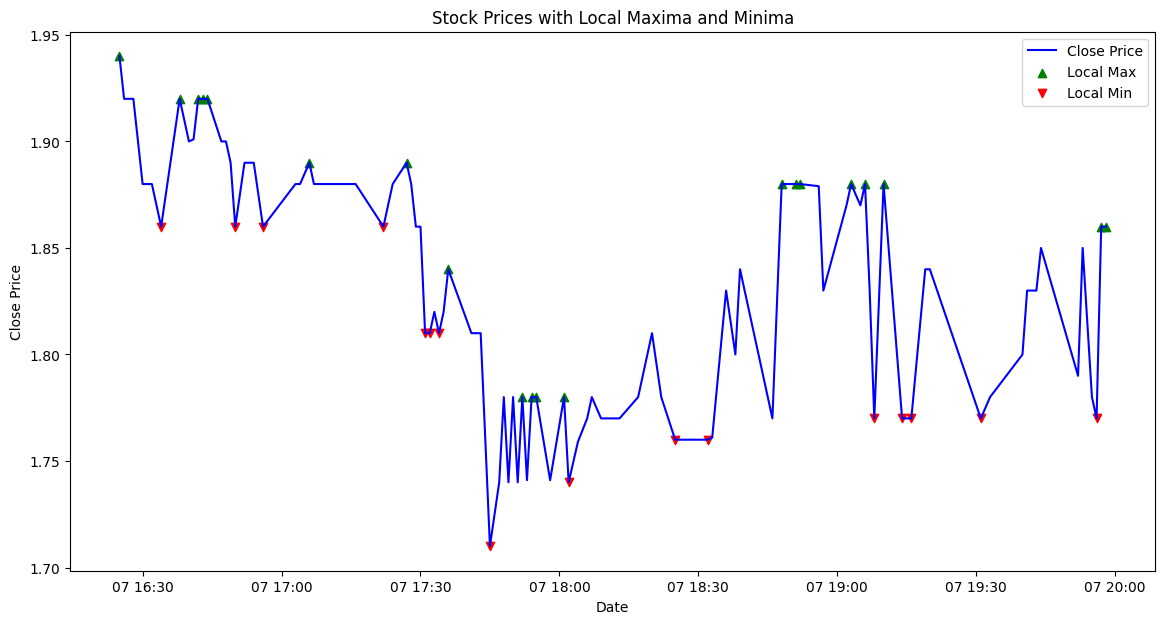

In [26]:
import matplotlib.pyplot as plt
# Plotting the data
plt.figure(figsize=(14, 7))
plt.plot(vrax_df['Date'], vrax_df['Close'], label='Close Price', color='blue')

# Plot local maxima
plt.scatter(vrax_df['Date'], vrax_df['Local_Max'], label='Local Max', color='green', marker='^', alpha=1)

# Plot local minima
plt.scatter(vrax_df['Date'], vrax_df['Local_Min'], label='Local Min', color='red', marker='v', alpha=1)

plt.title('Stock Prices with Local Maxima and Minima')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Average Rate of Change: 0.058618674233400885
Average Duration of Trends: nan


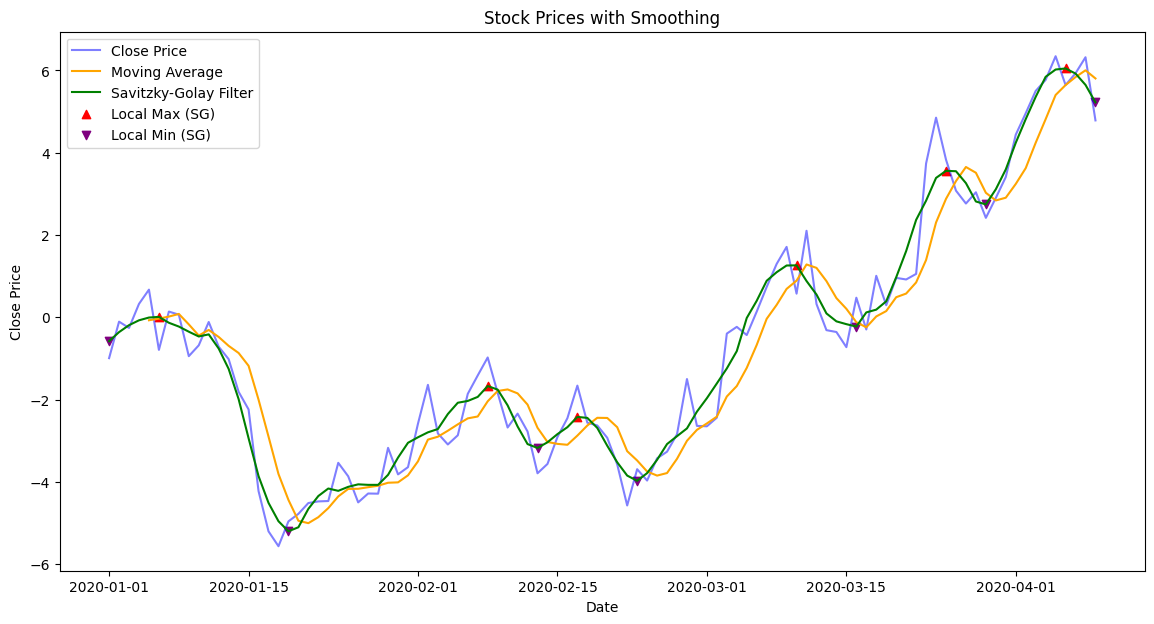

In [27]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema, savgol_filter
import matplotlib.pyplot as plt

# Sample data: replace this with your actual stock data
vrax_df = pd.DataFrame({
    'Close': np.random.randn(100).cumsum()
}, index=pd.date_range(start='1/1/2020', periods=100))

# Reset the index to convert DateTimeIndex to a regular column
vrax_df = vrax_df.reset_index()
vrax_df.rename(columns={'index': 'Date'}, inplace=True)

# Smooth the data using a moving average
window_size = 5
vrax_df['Close_MA'] = vrax_df['Close'].rolling(window=window_size).mean()

# Smooth the data using a Savitzky-Golay filter
window_size = 11  # window size should be odd
poly_order = 2  # polynomial order
vrax_df['Close_SG'] = savgol_filter(vrax_df['Close'], window_size, poly_order)

# Calculate local maxima and minima on the smoothed data (using Savitzky-Golay filter as an example)
vrax_df['Local_Max'] = vrax_df.iloc[argrelextrema(vrax_df['Close_SG'].values, np.greater_equal, order=5)[0]]['Close_SG']
vrax_df['Local_Min'] = vrax_df.iloc[argrelextrema(vrax_df['Close_SG'].values, np.less_equal, order=5)[0]]['Close_SG']

# Calculate the average rate of change
vrax_df['Change'] = vrax_df['Close_SG'].diff()
average_rate_of_change = vrax_df['Change'].mean()

# Calculate the duration of trends (number of data points between local maxima and minima)
local_extrema_indices = sorted(vrax_df.dropna(subset=['Local_Max', 'Local_Min']).index)
if len(local_extrema_indices) > 1:
    durations = np.diff(local_extrema_indices)
    average_duration = durations.mean()
else:
    average_duration = np.nan  # or handle appropriately if no durations are found

print("Average Rate of Change:", average_rate_of_change)
print("Average Duration of Trends:", average_duration)

# Plotting the data
plt.figure(figsize=(14, 7))
plt.plot(vrax_df['Date'], vrax_df['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(vrax_df['Date'], vrax_df['Close_MA'], label='Moving Average', color='orange')
plt.plot(vrax_df['Date'], vrax_df['Close_SG'], label='Savitzky-Golay Filter', color='green')

# Plot local maxima and minima
plt.scatter(vrax_df['Date'], vrax_df['Local_Max'], label='Local Max (SG)', color='red', marker='^')
plt.scatter(vrax_df['Date'], vrax_df['Local_Min'], label='Local Min (SG)', color='purple', marker='v')

plt.title('Stock Prices with Smoothing')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
